#### Operationalizing AI
#### Assignment 1: Programming Assignment: House Price Prediction with MLFlow
#### Hiba Hassan

In [29]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.linear_model import Lasso

#### MLFlow Autologging

In [30]:
## MLFlow Components
import mlflow
from mlflow.models import infer_signature

mlflow.set_experiment("MLflow Automatic Logging")
mlflow.autolog()

2024/02/16 19:02:42 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/02/16 19:02:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


### Part 1: Dataset & Data Prep
- Dataset Details: Housing Prices Dataset
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download
- Dataset Processing:
    - cleaning the data
    - handling missing values
    - feature engineering.

In [31]:
#Importing the dataset
house_prices = pd.read_csv("Housing.csv")

In [34]:
house_prices

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
house_prices.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
## Missing Values
house_prices.isnull().sum(axis=0)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
## Dealing with categorical variables
# One-hot encode categorical variables
house_prices_encoded = pd.get_dummies(house_prices, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                         'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

#### Exploratory Data Analysis

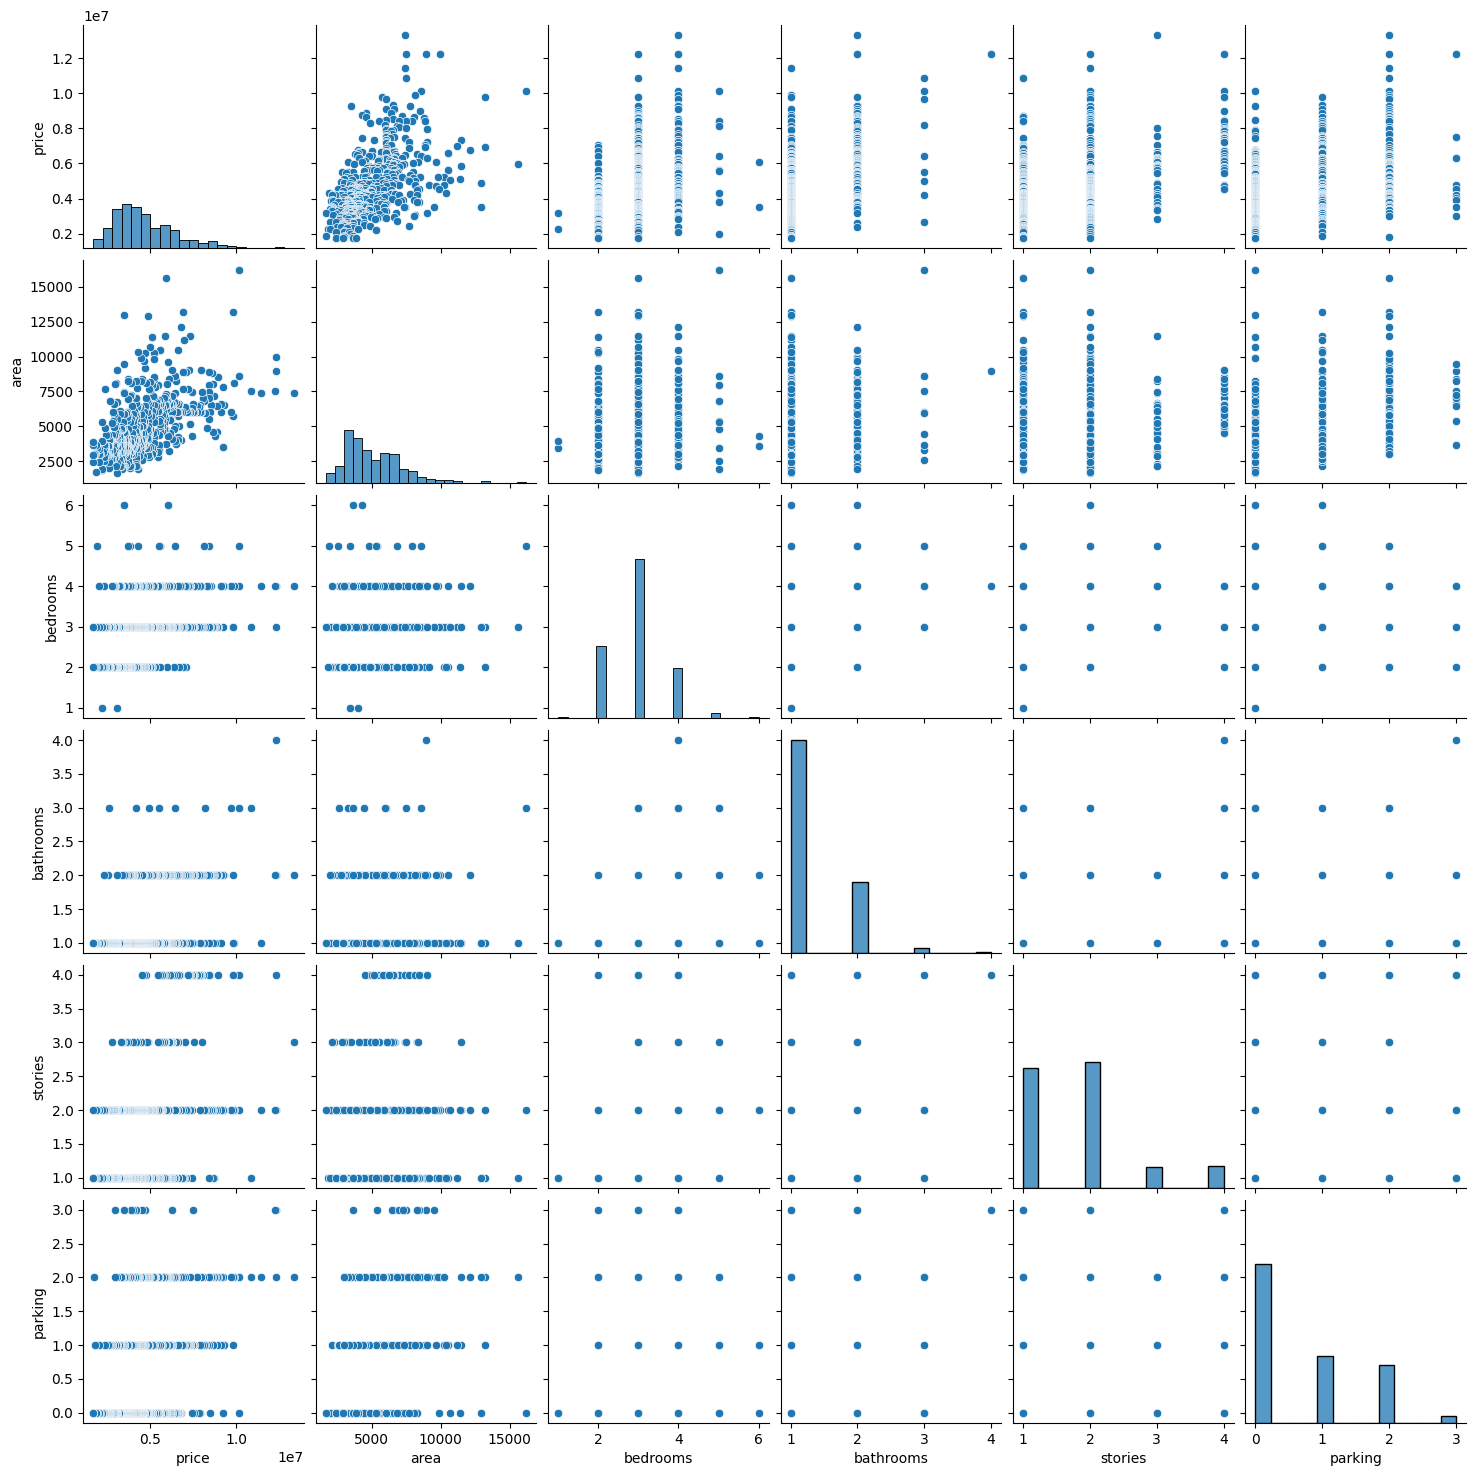

In [8]:
# Pairplot
sns.pairplot(house_prices)
plt.show()

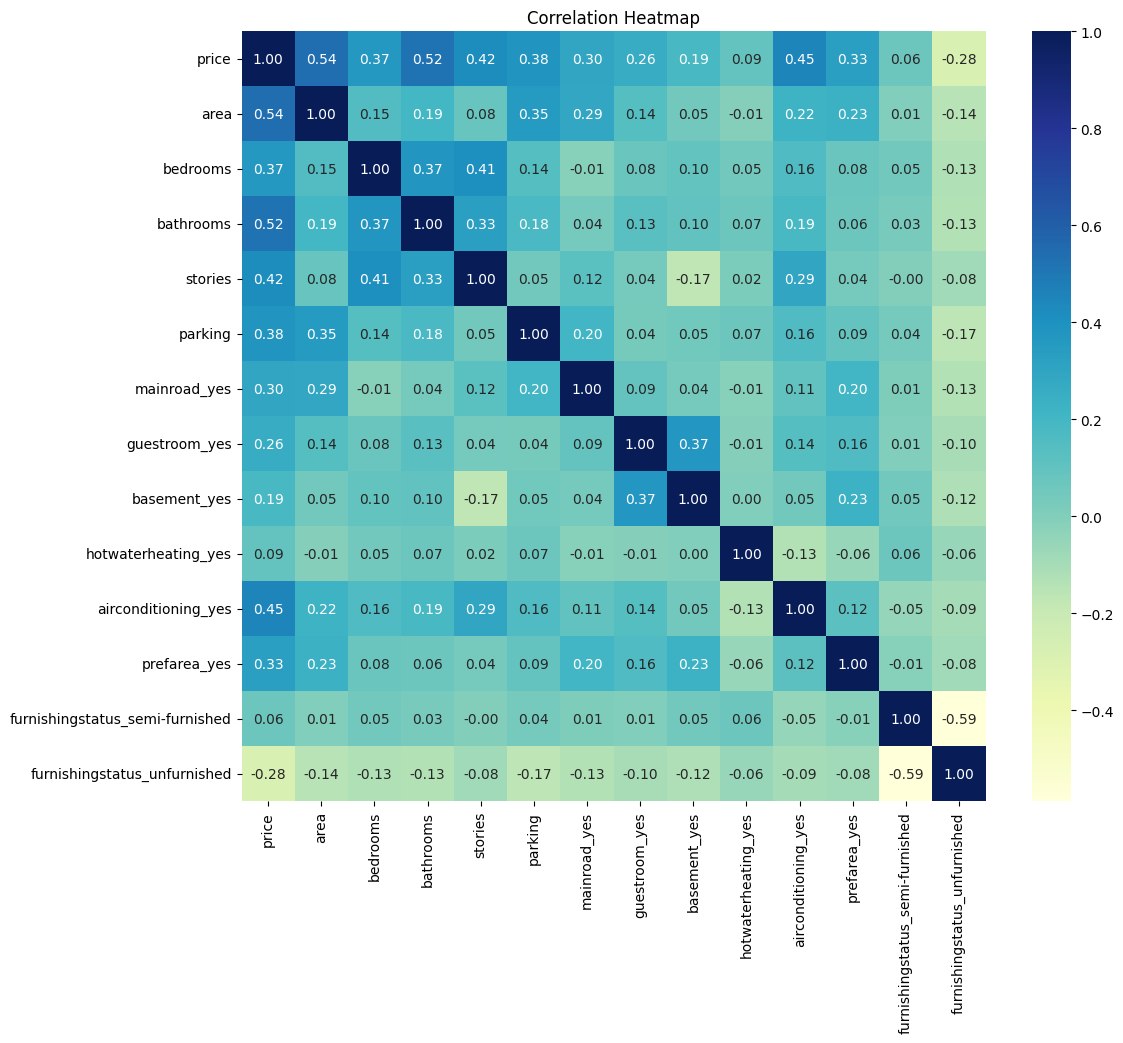

In [9]:
# Calculate correlation matrix
corr_matrix = house_prices_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Feature Engineering

In [10]:
# Identifying categorical and numerical columns
categorical_cols = house_prices_encoded.select_dtypes(include=['object', 'category']).columns
numerical_cols = house_prices_encoded.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Column transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols)])

### Part 2 and 3: Model Building and Evaluation

#### Defining an MLFlow Experiment

In [11]:
mlflow.set_experiment("House_Price_Prediction_Models")

<Experiment: artifact_location='file:///C:/Users/Hiba/Spring%202024/Operationalizing%20AI/Assignment%201/OAI-lab1/mlruns/205159110639901886', creation_time=1708100795735, experiment_id='205159110639901886', last_update_time=1708100795735, lifecycle_stage='active', name='House_Price_Prediction_Models', tags={}>

In [12]:
# Data Split - Target
X = house_prices_encoded.drop(columns=['price'])
y = house_prices_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Decision Tree

#### Log the model, hyperparameters, and loss metrics to MLflow.

In [13]:
# End the active MLflow run if there is one
if mlflow.active_run():
    mlflow.end_run()

# Start MLflow run and log the Decision Tree model
with mlflow.start_run(tags={"Model": "Decision Tree"}):
    # Model Training
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Model Evaluation
    y_pred_dt = dt_model.predict(X_test)
    mae_dt = mean_absolute_error(y_test, y_pred_dt)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    rmse_dt = mse_dt ** 0.5
    
    print("Decision Tree Model:")
    print(f"Mean Absolute Error (MAE): {mae_dt}")
    print(f"Mean Squared Error (MSE): {mse_dt}")
    print(f"Root Mean Squared Error (RMSE): {rmse_dt}")

    # Infer the model signature
    signature = infer_signature(X_train, dt_model.predict(X_train))
    
    # Log Metrics
    mlflow.log_params({"random_state": 42})
    mlflow.log_metrics({"MAE": mae_dt, "MSE": mse_dt, "RMSE": rmse_dt})
    
    # Log Model
    registered_model_name = "decision_tree_model"
    model_info = mlflow.sklearn.log_model(
        sk_model=dt_model,
        artifact_path="decision_tree_model",
        signature=signature,
        input_example=X_train,
        registered_model_name=registered_model_name
    )

2024/02/16 16:58:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\data\digest_utils.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/02/16 16:58:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64

Decision Tree Model:
Mean Absolute Error (MAE): 1195266.0550458715
Mean Squared Error (MSE): 2642802637614.6787
Root Mean Squared Error (RMSE): 1625669.904259373


Registered model 'decision_tree_model' already exists. Creating a new version of this model...
Created version '13' of model 'decision_tree_model'.


#### Predict House Prices

In [14]:
# Use the loaded model to predict house prices on the test dataset (X_test)
predictions = dt_model.predict(X_test)

# Create a DataFrame with the test dataset (X_test) columns as the feature names
result = pd.DataFrame(X_test, columns=X.columns)

# Add the actual house prices (y_test) to the DataFrame
result["actual_price"] = y_test

# Add the predicted house prices to the DataFrame
result["predicted_price"] = predictions

# Show the first few rows of the DataFrame
result

2024/02/16 16:58:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\data\digest_utils.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/02/16 16:58:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,actual_price,predicted_price
316,5900,4,2,2,1,False,False,True,False,False,False,False,True,4060000,5600000.0
77,6500,3,2,3,0,True,False,False,False,True,True,False,False,6650000,7840000.0
360,4040,2,1,1,0,True,False,False,False,False,False,True,False,3710000,3850000.0
90,5000,3,1,2,0,True,False,False,False,True,False,True,False,6440000,4935000.0
493,3960,3,1,1,0,True,False,False,False,False,False,False,False,2800000,2660000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,2,True,False,True,False,False,False,True,False,9100000,7343000.0
357,6930,4,1,2,1,False,False,False,False,False,False,False,False,3773000,5040000.0
39,6000,4,2,4,1,True,False,False,False,True,False,True,False,7910000,7560000.0
54,6000,3,2,2,1,True,True,False,False,True,False,True,False,7350000,7210000.0


### Part 4: Model Comparison
- In this section first we apply the two public models:
    - Zillow Kaggle competition Model: https://www.kaggle.com/code/danieleewww/xgboost-without-outliers-lb-0-06463
    - Melbourne Housing (Repo): https://github.com/vishal017/Melbourne_Housing/blob/main/Melbourne%20Housing.ipynb
- Load models into python
- Do a MAE comparison for the three models

#### Defining an MLFlow Experiment

In [15]:
mlflow.set_experiment("House_Price_Prediction_Models")

<Experiment: artifact_location='file:///C:/Users/Hiba/Spring%202024/Operationalizing%20AI/Assignment%201/OAI-lab1/mlruns/205159110639901886', creation_time=1708100795735, experiment_id='205159110639901886', last_update_time=1708100795735, lifecycle_stage='active', name='House_Price_Prediction_Models', tags={}>

In [16]:
# Model 1: Zillow Kaggle Competition - XGboost
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import mlflow

# Define xgboost parameters
xgb_params = {
    'eta': 0.033,
    'max_depth': 6,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
}

# Create DMatrix objects for train and test data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   nfold=5,
                   num_boost_round=500,
                   early_stopping_rounds=5,
                   verbose_eval=10, 
                   show_stdv=False
                  )
num_boost_rounds = len(cv_result)
print(num_boost_rounds)

# Train the XGBoost model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_rounds)

# Make predictions
y_pred = xgb_model.predict(dtest)

# Calculate evaluation metric (e.g., mean absolute error)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Log the model and its parameters with MLflow
with mlflow.start_run(tags={"Model": "XGBoost"}):
    
    # Log Metrics
    for key, value in xgb_params.items():
        mlflow.log_param(key, value)
    mlflow.log_metric("MAE", mae)
    
    # Log Model
    mlflow.xgboost.log_model(xgb_model, "xgboost_model")

[0]	train-mae:1315509.10160	test-mae:1329160.94753
[10]	train-mae:1031362.89716	test-mae:1100835.84201


C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:58:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[20]	train-mae:832978.79903	test-mae:965982.19183
[30]	train-mae:688849.80269	test-mae:884910.44611
[40]	train-mae:583762.12189	test-mae:833960.44246
[50]	train-mae:508151.01056	test-mae:801016.65159
[60]	train-mae:451068.77154	test-mae:784350.05061
[70]	train-mae:409066.56070	test-mae:773462.22100
[80]	train-mae:376276.84765	test-mae:765661.78384
[90]	train-mae:350739.89686	test-mae:763154.32645
[92]	train-mae:345989.15369	test-mae:762406.46157
89


2024/02/16 16:58:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4d1d345b18d5480a83c8038c5255525d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow
2024/02/16 16:58:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values.

Mean Absolute Error: 1034671.2408256881


C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:58:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


#### Predict House Prices

In [17]:
# Use the loaded model to predict house prices on the test dataset (X_test)
predictions_xgb = xgb_model.predict(dtest)

# Create a DataFrame with the test dataset (X_test) columns as the feature names
result_xgb = pd.DataFrame(X_test, columns=X.columns)

# Add the actual house prices (y_test) to the DataFrame
result_xgb["actual_price"] = y_test

# Add the predicted house prices to the DataFrame
result_xgb["predicted_price"] = predictions_xgb

# Show the first few rows of the DataFrame
result_xgb

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,actual_price,predicted_price
316,5900,4,2,2,1,False,False,True,False,False,False,False,True,4060000,5010479.50
77,6500,3,2,3,0,True,False,False,False,True,True,False,False,6650000,7289576.00
360,4040,2,1,1,0,True,False,False,False,False,False,True,False,3710000,3696755.25
90,5000,3,1,2,0,True,False,False,False,True,False,True,False,6440000,4413784.50
493,3960,3,1,1,0,True,False,False,False,False,False,False,False,2800000,3986776.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,2,True,False,True,False,False,False,True,False,9100000,5873069.00
357,6930,4,1,2,1,False,False,False,False,False,False,False,False,3773000,4603542.50
39,6000,4,2,4,1,True,False,False,False,True,False,True,False,7910000,7321685.50
54,6000,3,2,2,1,True,True,False,False,True,False,True,False,7350000,7351114.50


#### Defining an MLFlow Experiment

In [18]:
mlflow.set_experiment("House_Price_Prediction_Models")

<Experiment: artifact_location='file:///C:/Users/Hiba/Spring%202024/Operationalizing%20AI/Assignment%201/OAI-lab1/mlruns/205159110639901886', creation_time=1708100795735, experiment_id='205159110639901886', last_update_time=1708100795735, lifecycle_stage='active', name='House_Price_Prediction_Models', tags={}>

In [19]:
# Model 2: Melbourne Housing - Lasso
lasso = Lasso(alpha=25, max_iter=100, tol=0.1)
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Output the evaluation metrics
print("Lasso Regression Model:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Log the Lasso regression model with MLflow
with mlflow.start_run(tags={"Model": "Lasso Regression"}):
    # Log hyperparameters
    mlflow.log_param("alpha", 25)
    
    # Log evaluation metrics
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("rmse", rmse)
    
    # Log the trained model
    mlflow.sklearn.log_model(lasso, "lasso_model")

2024/02/16 16:58:59 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1778f20e48e645748b8eba170045d3e1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/02/16 16:58:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\data\digest_utils.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/02/16 16:58:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as f

Lasso Regression Model:
Mean Absolute Error (MAE): 970054.0598623906
Mean Squared Error (MSE): 1754383162789.1445
Root Mean Squared Error (RMSE): 1324531.299286334


#### Predict House Prices

In [20]:
# Use the loaded model to predict house prices on the test dataset (X_test)
predictions_lasso = lasso.predict(X_test)

# Create a DataFrame with the test dataset (X_test) columns as the feature names
result_lasso = pd.DataFrame(X_test, columns=X.columns)

# Add the actual house prices (y_test) to the DataFrame
result_lasso["actual_price"] = y_test

# Add the predicted house prices to the DataFrame
result_lasso["predicted_price"] = predictions_lasso

# Show the first few rows of the DataFrame
result_lasso

2024/02/16 16:59:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\data\digest_utils.py:29: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."
2024/02/16 16:59:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,actual_price,predicted_price
316,5900,4,2,2,1,False,False,True,False,False,False,False,True,4060000,5.164903e+06
77,6500,3,2,3,0,True,False,False,False,True,True,False,False,6650000,7.224444e+06
360,4040,2,1,1,0,True,False,False,False,False,False,True,False,3710000,3.109991e+06
90,5000,3,1,2,0,True,False,False,False,True,False,True,False,6440000,4.612140e+06
493,3960,3,1,1,0,True,False,False,False,False,False,False,False,2800000,3.294529e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,2,True,False,True,False,False,False,True,False,9100000,4.973512e+06
357,6930,4,1,2,1,False,False,False,False,False,False,False,False,3773000,4.336800e+06
39,6000,4,2,4,1,True,False,False,False,True,False,True,False,7910000,7.059118e+06
54,6000,3,2,2,1,True,True,False,False,True,False,True,False,7350000,6.398842e+06


#### Load the saved models as a Python function for Comparison

In [21]:
#Loading Decision Tree Model
decision_logged_model = 'runs:/2b0385e9cb5346f18049934f672f2285/decision_tree_model'
decision_tree_model = mlflow.pyfunc.load_model(decision_logged_model)

#Loading XGBoost Model
xgboost_logged_model = 'runs:/9c3e1154d93e4707805bee0139be487e/xgboost_model'
xgboost_model = mlflow.pyfunc.load_model(xgboost_logged_model)

#Loading Lasso Model
lasso_logged_model = 'runs:/7b6d584f386d40549c577580bccfa81f/lasso_model'
lasso_model = mlflow.pyfunc.load_model(lasso_logged_model)

C:\Users\Hiba\Spring 2024\Operationalizing AI\Assignment 1\OAI-lab1\myenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:59:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


#### MAE Models Comparison

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions for Decision Tree
dt_predictions = decision_tree_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Predictions for XGBoost
xgb_predictions = xgboost_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Predictions for Lasso
lasso_predictions = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Create a DataFrame to compare models
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost', 'Lasso'],
    'MAE': [dt_mae, xgb_mae, lasso_mae],
    'MSE': [dt_mse, xgb_mse, lasso_mse],
    'R^2': [dt_r2, xgb_r2, lasso_r2]
})

comparison_df

,Model,MAE,MSE,R^2
0,Decision Tree,1.195266e+06,2.642803e+12,0.477146
1,XGBoost,1.034671e+06,2.073675e+12,0.589743
2,Lasso,9.700541e+05,1.754383e+12,0.652912


#### Visualizing Comparisons

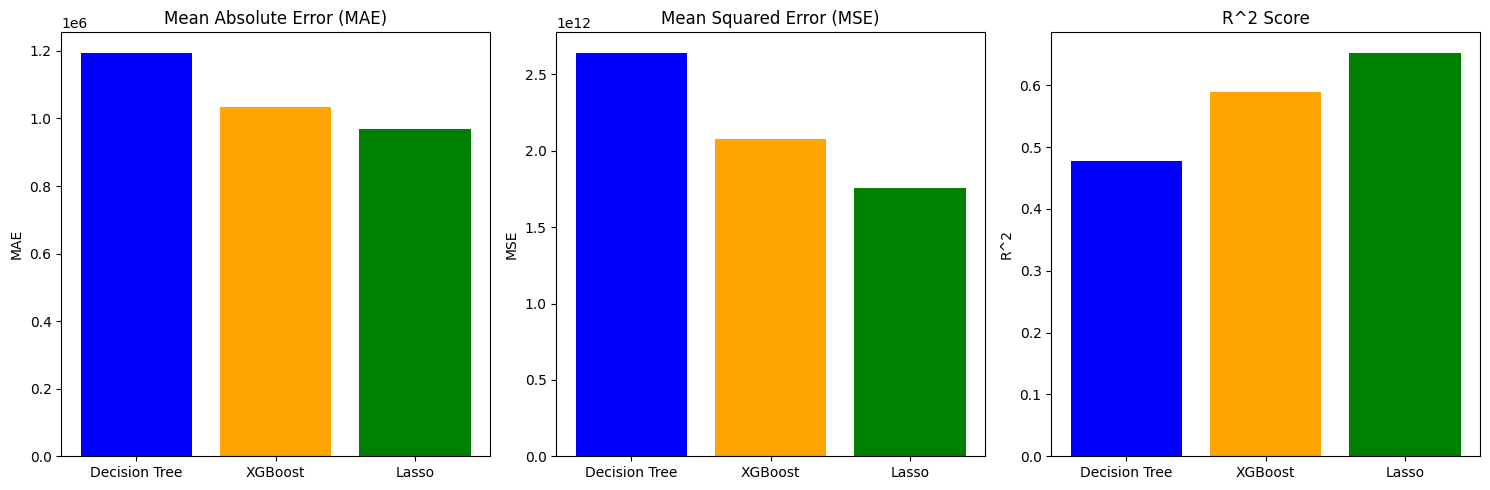

In [23]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bar plot for MAE
axs[0].bar(comparison_df['Model'], comparison_df['MAE'], color=['blue', 'orange', 'green'])
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')

# Bar plot for MSE
axs[1].bar(comparison_df['Model'], comparison_df['MSE'], color=['blue', 'orange', 'green'])
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE')

# Bar plot for R^2
axs[2].bar(comparison_df['Model'], comparison_df['R^2'], color=['blue', 'orange', 'green'])
axs[2].set_title('R^2 Score')
axs[2].set_ylabel('R^2')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

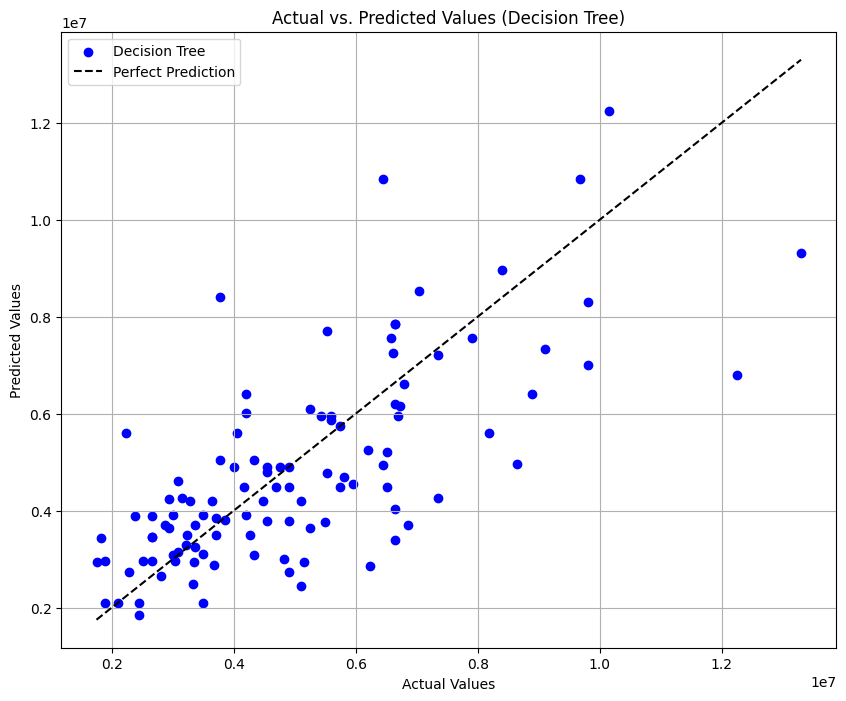

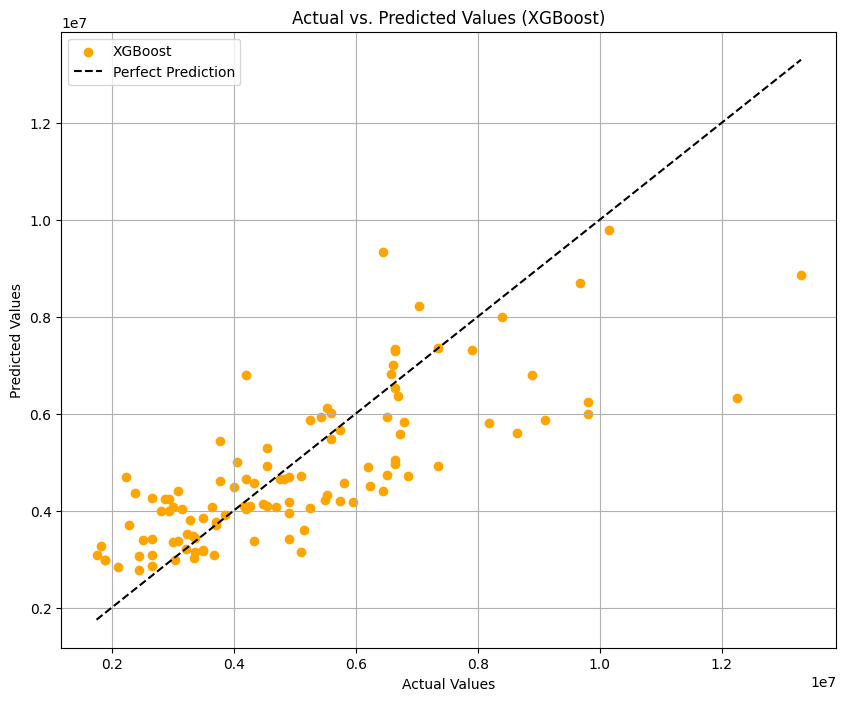

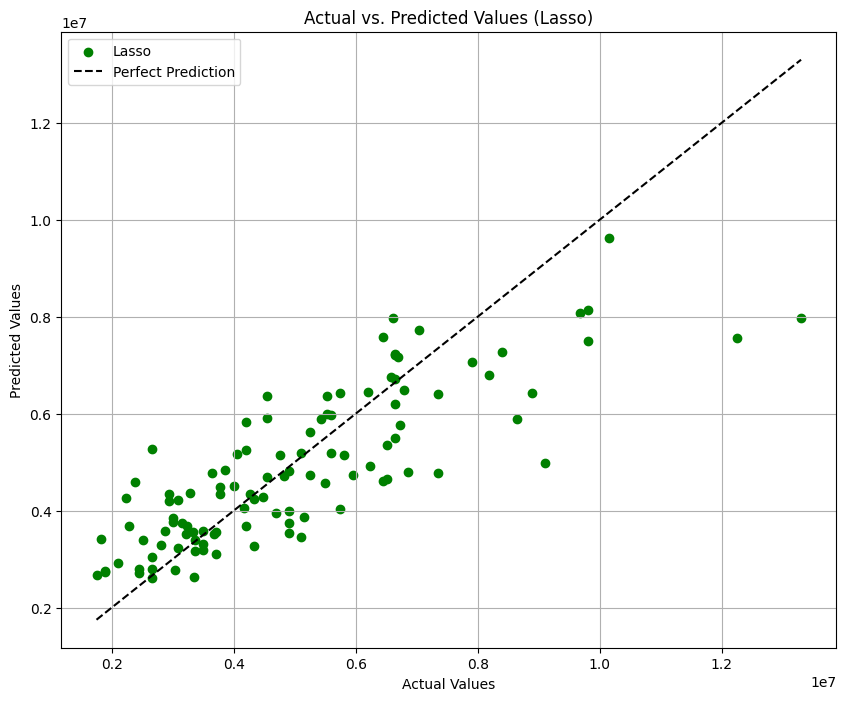

In [24]:
import numpy as np

# Scatter plot for Decision Tree
plt.figure(figsize=(10, 8))
plt.scatter(y_test, dt_predictions, color='blue', label='Decision Tree')
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for XGBoost
plt.figure(figsize=(10, 8))
plt.scatter(y_test, xgb_predictions, color='orange', label='XGBoost')
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Lasso
plt.figure(figsize=(10, 8))
plt.scatter(y_test, lasso_predictions, color='green', label='Lasso')
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='black', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Lasso)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

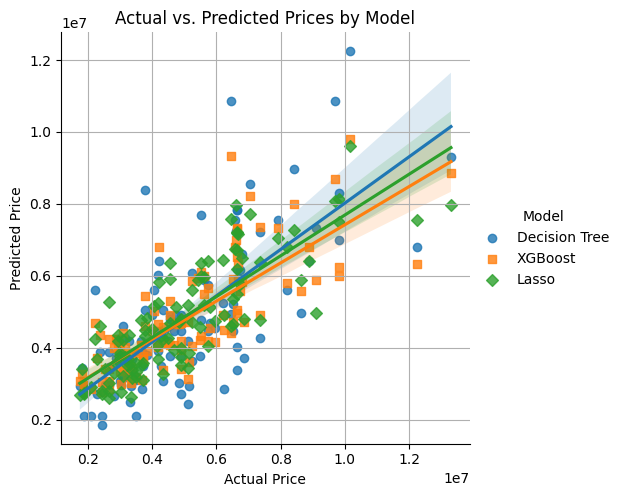

In [25]:
import seaborn as sns

# Combine all results into one DataFrame
result_combined = pd.concat([result.assign(Model='Decision Tree'),
                             result_xgb.assign(Model='XGBoost'),
                             result_lasso.assign(Model='Lasso')])

# Plot actual vs. predicted prices with trendlines for each model
plt.figure(figsize=(12, 8))
sns.lmplot(x='actual_price', y='predicted_price', hue='Model', data=result_combined, markers=['o', 's', 'D'])
plt.title('Actual vs. Predicted Prices by Model')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

### Part 5: Model Serving
- Unsure about this section as chat GPT shares the following methodology but I am not sure how to connect and load the API/Json thing

Decision Trees
#import requests
#import json

Define the URL of the MLflow model server for the Decision Tree model
#mlflow_server_url = "hhttp://127.0.0.1:5000/#/experiments/205159110639901886/runs/070dc76e36674c3ab63ec18e6a4d6ea0"

Make a POST request to the MLflow model server for prediction
#response = requests.post(mlflow_server_url, json=sample_data)

Parse the prediction result
#prediction_result = json.loads(response.text)

Print the prediction result
#print("Prediction:", prediction_result)

### View the Run in the MLflow UI

In [26]:
!mlflow ui 

^C


#### References
- ChatGPT
- https://github.com/jyunyuk/OAI-lab1/tree/main
- https://github.com/jyunyuk/OAI-lab2
- Exploratory data analysis and visualization class notes - code used for visualization

## -----------------------------------------------------------------------------------------------------------------------------------